### Importing Necessary Libraries

In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
ls = WordNetLemmatizer()

import plotly as py
import cufflinks as cf

from plotly.offline import iplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to generate plots offline and save them in local machine using plotly
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# To display complete reviews
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)

In [5]:
# Importing Dataset
reviews=pd.read_excel('Echo_Dot.xlsx')

In [6]:
reviews.head()

,body
0,The media could not be loaded.\n \n\n\n\n Alexa cannot hear after she starts playing
1,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly."
2,"The media could not be loaded.\n \n\n\n\n/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy."
3,The media could not be loaded.\n \n\n\n\n Do not buy this product. When i asked alexa that kashmir is part of which country it said china.Boycott alexa
4,Its just one if the best deal i ever got on amazon I purchased it with a 12 watt wipro light at 2200 and enjoying it since last 2 daya its my 4th echo device and yes I would highly recommend buying a product with this just search echo dot wall mount you ll see a 800-900 rupees wall mount trust me it will make a huge difference between sound and transportability plus when its on wall if will recognise your voice quicker as it faces you on the wall seriously guys the combination of these two is compulsory


In [7]:
reviews.shape

(4157, 1)

In [8]:
#checking for null entries
reviews.isnull().sum()

body    0
dtype: int64

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    4157 non-null   object
dtypes: object(1)
memory usage: 32.6+ KB


In [10]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
def cleaning(text):
    text = decontracted(text)
    text = text.lower()                              #lowering the text
    text = text.replace('the media could not be loaded.','')
    text = re.sub(r'#\S+','',text)                   #Remove the hyper link
    text = re.sub('[^a-z]',' ',text)              #Remove the character other than alphabet
    return text

reviews['cleaned'] = reviews['body'].apply(cleaning)
reviews.head()

,body,cleaned
0,The media could not be loaded.\n \n\n\n\n Alexa cannot hear after she starts playing,alexa cannot hear after she starts playing
1,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",i purchased this as a birthday gift for my years old son since he do not have siblings so i though it would be a fun experience for him talking to and giving commands to alexa but to my dismay he only used it for playing music that also only one song after one month of his birthday alexa please play the flying jat song there were things i demonstrated him about alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc but after one month of use he lost interest in it and being powered from socket i am also not interested to use it as a bluetooth speaker i configured it to control a wipro smart bulb but after few days i started using the smart bulb as a regular bulb because it is easier to press the physical switch compared to checking the configuration connection everytime alexa bulb on or alexa bulb off voice command does not work so now it is kept idle since months and will remain so for many more months years to come the bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly
2,"The media could not be loaded.\n \n\n\n\n/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",here i am uploading video enjoy most idiotic device i every bought never play original songs always play some or the other remix or instrumental songs i wish i would have bought google home or some bluetooth speakers some attachments after talking to amazon echo dot executive after my above review echo dot representative called me i am glad for this i showed him the issue with song selection but he told me that it is because of library does not have songs that i am selecting and it is better to add gaana com from alexa app after following his guideli

In [12]:
reviews.cleaned[:1]

0                          alexa cannot hear after she starts playing
Name: cleaned, dtype: object

In [13]:
from textblob import TextBlob
reviews['polarity']=(round(reviews['cleaned'].apply(lambda x:TextBlob(x).sentiment.polarity),4))
reviews['polarity'].iplot(kind='hist',xTitle='Polarity',yTitle='Count',title='Sentiment Polarity Distribution')

In [14]:
pol=[]
for i in reviews.polarity:
    if i<0:
        pol.append('negative')
    elif i>0:
        pol.append('positive')
    else:
        pol.append('neutral')
reviews['sentiment']=pol

In [15]:
reviews.head()

,body,cleaned,polarity,sentiment
0,The media could not be loaded.\n \n\n\n\n Alexa cannot hear after she starts playing,alexa cannot hear after she starts playing,0.0000,neutral
1,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",i purchased this as a birthday gift for my years old son since he do not have siblings so i though it would be a fun experience for him talking to and giving commands to alexa but to my dismay he only used it for playing music that also only one song after one month of his birthday alexa please play the flying jat song there were things i demonstrated him about alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc but after one month of use he lost interest in it and being powered from socket i am also not interested to use it as a bluetooth speaker i configured it to control a wipro smart bulb but after few days i started using the smart bulb as a regular bulb because it is easier to press the physical switch compared to checking the configuration connection everytime alexa bulb on or alexa bulb off voice command does not work so now it is kept idle since months and will remain so for many more months years to come the bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly,0.1691,positive
2,"The media could not be loaded.\n \n\n\n\n/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",here i am uploading video enjoy most idiotic device i every bought never play original songs always play some or the other remix or instrumental songs i wish i would have bought google home or some bluetooth speakers some attachments after talking to amazon echo dot executive after my above review echo dot representative called me i am glad for this i showed him the issue with song selection but he told me that it is because of library does not have songs that i am selecting and it is better to add ga

In [16]:
reviews.sentiment.value_counts()

positive    3073
neutral      591
negative     493
Name: sentiment, dtype: int64

In [17]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(reviews.iloc[reviews['polarity'].sort_values(ascending=False)[:5].index]['cleaned']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 excellent
Review 2:
 best n best 
Review 3:
 it is best
Review 4:
 it is a very intelligent product
Review 5:
 perfect product  no problem  everyone should buy it 


In [18]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(reviews.iloc[reviews['polarity'].sort_values(ascending=True)[:5].index]['cleaned']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 this is the worst item i have buy in amazon  echo alexa consume a lot internet which is not gud and make phone hang 
Review 2:
 terrible product
Review 3:
 worst
Review 4:
 hii do not know where to start  since day   there is issue in configuring wifi  the steps not helping  alexa support is horrible  seems they do not care  i do not know what to do with this alexa  use as a      inr speaker  
Review 5:
 worst worst


In [19]:
reviews['sentiment'].iplot(kind='hist',bins=50,xTitle='Sentiment', yTitle='Count',title='Sentiment Distribution Chart')

In [20]:
reviews['word_count']=reviews['cleaned'].apply(lambda x:len(x.split()))
reviews['word_count'].iplot(kind='hist',bins=50,xTitle='Word Count', yTitle='Count',title='Word Count Distribution')

In [21]:
reviews['avg_length'] = reviews["cleaned"].apply(lambda x: np.mean([len(w) for w in x.split()]))
reviews['avg_length'].iplot(kind='hist',bins=50, xTitle='Average Word Length', yTitle='Count', title='Avg Word Length Dist')

In [22]:
reviews['review_len']=reviews['cleaned'].apply(lambda x:len(x))

In [23]:
reviews.head()

,body,cleaned,polarity,sentiment,word_count,avg_length,review_len
0,The media could not be loaded.\n \n\n\n\n Alexa cannot hear after she starts playing,alexa cannot hear after she starts playing,0.0000,neutral,7,5.142857,64
1,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",i purchased this as a birthday gift for my years old son since he do not have siblings so i though it would be a fun experience for him talking to and giving commands to alexa but to my dismay he only used it for playing music that also only one song after one month of his birthday alexa please play the flying jat song there were things i demonstrated him about alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc but after one month of use he lost interest in it and being powered from socket i am also not interested to use it as a bluetooth speaker i configured it to control a wipro smart bulb but after few days i started using the smart bulb as a regular bulb because it is easier to press the physical switch compared to checking the configuration connection everytime alexa bulb on or alexa bulb off voice command does not work so now it is kept idle since months and will remain so for many more months years to come the bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly,0.1691,positive,203,4.231527,1090
2,"The media could not be loaded.\n \n\n\n\n/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",here i am uploading video enjoy most idiotic device i every bought never play original songs always play some or the other remix or instrumental songs i wish i would have bought google home or some bluetooth speakers some attachments after talking to amazon echo dot executive after my above review echo dot representative called me i am glad for this i showed him the issue with song selection but he told me that it is because of library d

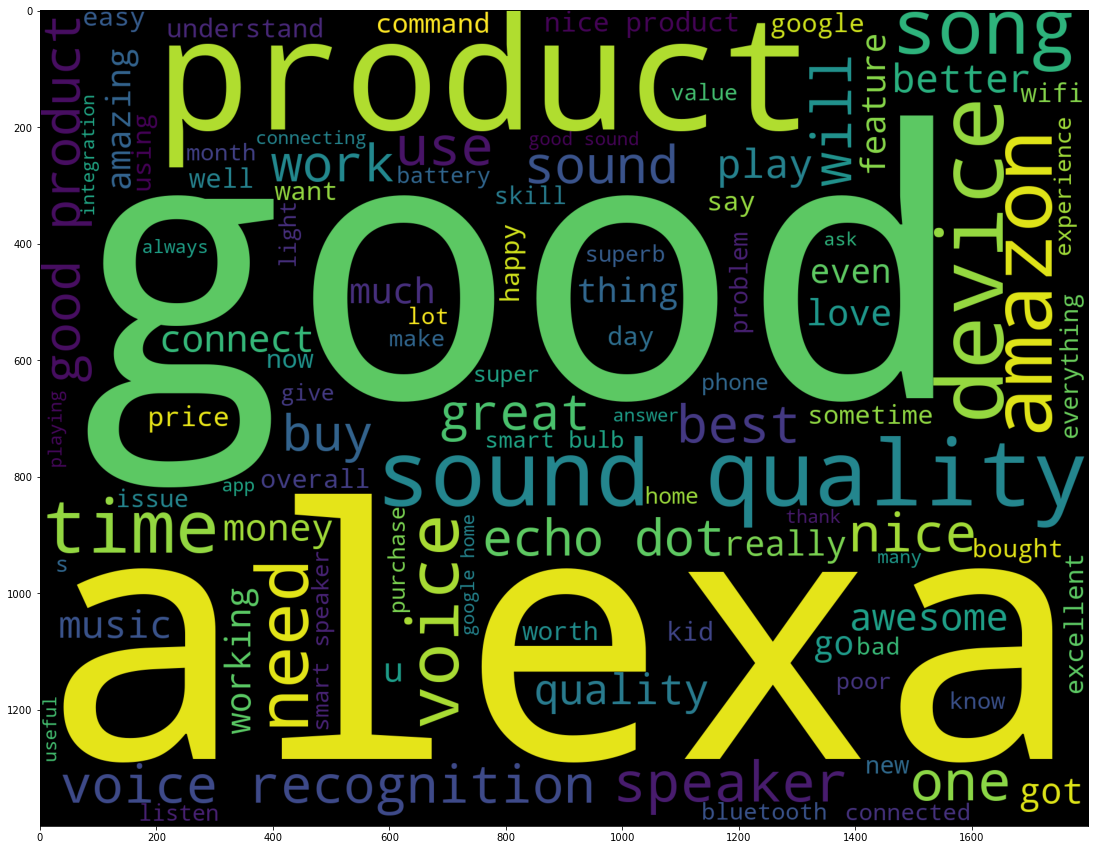

In [24]:
from wordcloud import WordCloud
string = " ".join(reviews.cleaned)
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400,max_words=100).generate(string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_ip)

### Distribution of Unigram, Bigram and Trigram

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

### Unigram

In [26]:
def get_top_n_words(x,n):
    vec=CountVectorizer(stop_words='english')
    bow=vec.fit_transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1], reverse=True)
    return words_freq[:n]

words=get_top_n_words(reviews['cleaned'],20)

In [27]:
words

[('good', 1439),
 ('product', 1282),
 ('alexa', 1059),
 ('sound', 723),
 ('quality', 693),
 ('voice', 546),
 ('amazon', 521),
 ('device', 402),
 ('nice', 367),
 ('smart', 359),
 ('speaker', 354),
 ('echo', 327),
 ('like', 323),
 ('music', 306),
 ('great', 284),
 ('recognition', 277),
 ('dot', 267),
 ('best', 260),
 ('time', 259),
 ('just', 252)]

In [28]:
df_uni=pd.DataFrame(words,columns=['unigram','frequency'])
df_uni.head()

,unigram,frequency
0,good,1439
1,product,1282
2,alexa,1059
3,sound,723
4,quality,693


In [29]:
df_uni=df_uni.set_index('unigram')
df_uni.iplot(kind='bar', xTitle='Unigram', yTitle='Count', title='Top 20 Unigram Words')

### Bigram

In [30]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(2,2),stop_words='english')
    bow=vec.fit_transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1], reverse=True)
    return words_freq[:n]

words=get_top_n_words(reviews['cleaned'],20)

In [31]:
words

[('sound quality', 442),
 ('voice recognition', 236),
 ('good product', 215),
 ('echo dot', 213),
 ('quality good', 134),
 ('nice product', 126),
 ('good sound', 79),
 ('smart speaker', 78),
 ('smart bulb', 76),
 ('google home', 73),
 ('product good', 72),
 ('product amazon', 62),
 ('value money', 57),
 ('great product', 57),
 ('really good', 53),
 ('recognition good', 53),
 ('excellent product', 52),
 ('alexa app', 51),
 ('amazing product', 49),
 ('bluetooth speaker', 48)]

In [32]:
df_bi=pd.DataFrame(words,columns=['bigram','frequency'])
df_bi

,bigram,frequency
0,sound quality,442
1,voice recognition,236
2,good product,215
3,echo dot,213
4,quality good,134
5,nice product,126
6,good sound,79
7,smart speaker,78
8,smart bulb,76
9,google home,73


In [33]:
df_bi=df_bi.set_index('bigram')
df_bi.iplot(kind='bar', xTitle='Bigram', yTitle='Count', title='Top 20 Bigram Words')

### Trigram

In [34]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(3,3),stop_words='english')
    bow=vec.fit_transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1], reverse=True)
    return words_freq[:n]

words=get_top_n_words(reviews['cleaned'],20)

In [35]:
words

[('sound quality good', 97),
 ('good sound quality', 49),
 ('voice recognition good', 48),
 ('wipro smart bulb', 29),
 ('good voice recognition', 27),
 ('google home mini', 24),
 ('product sound quality', 21),
 ('echo dot rd', 20),
 ('alexa echo dot', 19),
 ('amazon echo dot', 17),
 ('sound quality voice', 17),
 ('dot rd gen', 16),
 ('quality voice recognition', 16),
 ('sound quality awesome', 15),
 ('sound quality better', 15),
 ('voice recognition sound', 14),
 ('recognition sound quality', 13),
 ('better google home', 13),
 ('dot rd generation', 12),
 ('voice recognition poor', 12)]

In [36]:
df_tri=pd.DataFrame(words,columns=['trigram','frequency'])
df_tri

,trigram,frequency
0,sound quality good,97
1,good sound quality,49
2,voice recognition good,48
3,wipro smart bulb,29
4,good voice recognition,27
5,google home mini,24
6,product sound quality,21
7,echo dot rd,20
8,alexa echo dot,19
9,amazon echo dot,17


In [37]:
df_tri=df_tri.set_index('trigram')
df_tri.iplot(kind='bar', xTitle='Trigram', yTitle='Count', title='Top 20 Trigram Words')

In [38]:
# Removing extra spaces if any
reviews['cleaned']=reviews['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [39]:
#reviews.to_csv('Preprocessed_Dataset.csv')